# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109B Data Science 2: Advanced Topics in Data Science 

##  Project F: Measuring the Shape and Brightness of Galaxies with Neural Networks
### Milestone 2: Exploratory Data Analysis
### Group 75: Dmitry Vukolov, Ning Xu, Rohit Beri, Sunil Chomal


**Harvard University**<br/>
**Spring 2020**<br/>
**Instructors**: Pavlos Protopapas, Mark Glickman and Chris Tanner<br/>


<hr style="height:2pt">

---



In [1]:
#RUN THIS CELL 
import requests
from IPython.core.display import HTML, display
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css"
                     ).text
HTML(styles)

---

## <div class="theme"> Overview </div> 

<div style="border: 3px solid #800080; padding: 10px"> 
    
***Information about the galaxies***

### <div class='exercise'> <b> Step 0: Load the essential libraries </b> </div>

In [2]:
# Load useful libraries
import os
import sys
import copy 
import math
import time
import random 
import numpy as np
import pandas as pd
import ipywidgets as widgets

# Import h5py for reading h5 files
import h5py

# Load glasim for data generation
import galsim

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

### <div class='exercise'> <b> Step 1: Load the data </b> </div>

In [3]:
# Read the data set
f= h5py.File('./data/Data1.h5','r')
image = f['img'][:]    
cat = f['cat'][:]  
label = f['label'][:]   # this gives the set of parameters that characterize the galaxy 
psf = f['psf_r'][:]
snr = f['snr'][:]
sigma = f['sigma'][:]
image_nonoise = f['img_nonoise'][:]    
image_withnoise = f['img_withnoise'][:]  

keys = [key for key in list(f.keys())]
print("Keys in Database:")
for key in keys:
    print('          {}'.format(key))

f.close()

Keys in Database:
          cat
          img
          img_nonoise
          img_withnoise
          label
          psf_r
          sigma
          snr


<div style="border: 3px solid #800080; padding: 10px"> 

***Observations:***
* Database comprises of 8 different tables with the names as following:
    - **cat:** This contains set of original images and preprocessed images.
    - **img:** This table contains the original images of the galaxies.
    - **img_nonoise:** This table contains cleaned up images without noise.
    - **img_withnoise:** This tables contains noisy version of cleaned up images and looks similar to $img$ except in scaling.
    - **label:** This table captures the set of parameters that characterize the galaxy.
    - **sigma:** This table contains information about the level of noise in each image.
    - **snr:** This table contains information about the signal to noise ratio of a given image.
    - **psf_r**: This table likely contains information about PSF or point spread function. PSF gives a measure of the amount of blurring that is added to any given object as a result of imperfections in the optics.

### <div class='exercise'> <b> Step 2: Structure and Size of the data </b> </div>

In [4]:
# Structure and Size of the Data
print('Image Shape            = {}'.format(image.shape))
print('No-noise Image Shape   = {}'.format(image_nonoise.shape))
print('With-noise Image Shape = {}'.format(image_withnoise.shape))
print('Cat Shape              = {}'.format(cat.shape))
print('Label Shape            = {}'.format(label.shape))
print('SNR Shape              = {}'.format(snr.shape))
print('Sigma Shape            = {}'.format(sigma.shape))
print('PSF-R Shape            = {}'.format(psf.shape))

Image Shape            = (18779, 64, 64)
No-noise Image Shape   = (18779, 64, 64)
With-noise Image Shape = (18779, 64, 64)
Cat Shape              = (18779, 6, 64, 64)
Label Shape            = (18779, 5)
SNR Shape              = (18779,)
Sigma Shape            = (18779,)
PSF-R Shape            = (20000,)


<div style="border: 3px solid #800080; padding: 10px"> 

***Observations:***
* All the tables in the database contain $18779$ data points with the exception of PSF table
* At this stage, since we are unaware of the reasons of this discrepency, we will ignore the PSF table for EDA
* Image table, Non-noise Image table & With-noise Image table, all three contain $18779$ images with $64*64$ resolution
* Cat table comprises of $18779 * 6$ images with $64*64$ resolution ($18779$ images from Image table and $5$ preprocessed images for each such image)
* Label table contains information about $5$ different attributes of the galaxy. These attributes are $flux$, $sersic\ index$, $sersic\ radius$, $g1$ and $g2$
* Sigma table contains information about the noise added to the image and SNR gives the signal to noise ratio in the resulting image

### <div class='exercise'> <b> Step 3: Basic Statistics of the data </b> </div>

In [5]:
print('Image:            Mean = {:8.2f} | Var = {:9.2f} | Max = {:8.2f} | Min = {:8.2f}'.format(image.mean(),
                                                                                                image.var(),
                                                                                                image.max(), 
                                                                                                image.min()))
print('No-noise Image:   Mean = {:8.2f} | Var = {:9.2f} | Max = {:8.2f} | Min = {:8.2f}'.format(image_nonoise.mean(),
                                                                                                image_nonoise.var(),
                                                                                                image_nonoise.max(),
                                                                                                image_nonoise.min()))
print('With-noise Image: Mean = {:8.2f} | Var = {:9.2f} | Max = {:8.2f} | Min = {:8.2f}'.format(image_withnoise.mean(),
                                                                                                image_withnoise.var(),
                                                                                                image_withnoise.max(),
                                                                                                image_withnoise.min()))

print('\n')

print('Cat Image 0:      Mean = {:8.2f} | Var = {:9.2f} | Max = {:8.2f} | Min = {:8.2f}'.format(cat[:,0].mean(),
                                                                                                cat[:,0].var(),
                                                                                                cat[:,0].max(), 
                                                                                                cat[:,0].min()))
print('Cat Image 1:      Mean = {:8.2f} | Var = {:9.2f} | Max = {:8.2f} | Min = {:8.2f}'.format(cat[:,1].mean(),
                                                                                                cat[:,1].var(),
                                                                                                cat[:,1].max(), 
                                                                                                cat[:,1].min()))
print('Cat Image 2:      Mean = {:8.2f} | Var = {:9.2f} | Max = {:8.2f} | Min = {:8.2f}'.format(cat[:,2].mean(),
                                                                                                cat[:,2].var(),
                                                                                                cat[:,2].max(), 
                                                                                                cat[:,2].min()))
print('Cat Image 3:      Mean = {:8.2f} | Var = {:9.2f} | Max = {:8.2f} | Min = {:8.2f}'.format(cat[:,3].mean(),
                                                                                                cat[:,3].var(),
                                                                                                cat[:,3].max(), 
                                                                                                cat[:,3].min()))
print('Cat Image 4:      Mean = {:8.2f} | Var = {:9.2f} | Max = {:8.2f} | Min = {:8.2f}'.format(cat[:,4].mean(),
                                                                                                cat[:,4].var(),
                                                                                                cat[:,4].max(), 
                                                                                                cat[:,4].min()))
print('Cat Image 5:      Mean = {:8.2f} | Var = {:9.2f} | Max = {:8.2f} | Min = {:8.2f}'.format(cat[:,5].mean(),
                                                                                                cat[:,5].var(),
                                                                                                cat[:,5].max(), 
                                                                                                cat[:,5].min()))

print('\n')

print('SNR:              Mean = {:8.2f} | Var = {:9.2f} | Max = {:8.2f} | Min = {:8.2f}'.format(snr.mean(), 
                                                                                                snr.var(),
                                                                                                snr.max(), 
                                                                                                snr.min()))
print('Sigma:            Mean = {:8.2f} | Var = {:9.2f} | Max = {:8.2f} | Min = {:8.2f}'.format(sigma.mean(),
                                                                                                sigma.var(),
                                                                                                sigma.max(), 
                                                                                                sigma.min()))
print('PSF-R:            Mean = {:8.2f} | Var = {:9.2f} | Max = {:8.2f} | Min = {:8.2f}'.format(psf.mean(),
                                                                                                psf.var(),
                                                                                                psf.max(), 
                                                                                                psf.min()))

print('\n')

print('Flux:             Mean = {:8.2f} | Var = {:9.2f} | Max = {:8.2f} | Min = {:8.2f}'.format(label[:,0].mean(),
                                                                                                label[:,0].var(),
                                                                                                label[:,0].max(), 
                                                                                                label[:,0].min()))
print('Sersic Index:     Mean = {:8.2f} | Var = {:9.2f} | Max = {:8.2f} | Min = {:8.2f}'.format(label[:,1].mean(),
                                                                                                label[:,1].var(),
                                                                                                label[:,1].max(), 
                                                                                                label[:,1].min()))
print('Sersic Radius:    Mean = {:8.2f} | Var = {:9.2f} | Max = {:8.2f} | Min = {:8.2f}'.format(label[:,2].mean(),
                                                                                                label[:,2].var(),
                                                                                                label[:,2].max(), 
                                                                                                label[:,2].min()))
print('g1:               Mean = {:8.2f} | Var = {:9.2f} | Max = {:8.2f} | Min = {:8.2f}'.format(label[:,3].mean(),
                                                                                                label[:,3].var(),
                                                                                                label[:,3].max(), 
                                                                                                label[:,3].min()))
print('g2:               Mean = {:8.2f} | Var = {:9.2f} | Max = {:8.2f} | Min = {:8.2f}'.format(label[:,4].mean(),
                                                                                                label[:,4].var(),
                                                                                                label[:,4].max(), 
                                                                                                label[:,4].min()))

Image:            Mean =     0.14 | Var =      1.70 | Max =    36.95 | Min =    -5.47
No-noise Image:   Mean =    40.74 | Var =  66796.32 | Max = 13615.28 | Min =    -0.13
With-noise Image: Mean =    40.76 | Var = 160145.77 | Max = 14236.50 | Min = -1950.24


Cat Image 0:      Mean =     0.14 | Var =      1.70 | Max =    36.95 | Min =    -5.47
Cat Image 1:      Mean =     1.22 | Var =     70.65 | Max =   965.49 | Min =     0.00
Cat Image 2:      Mean =     0.08 | Var =      0.65 | Max =    12.91 | Min =    -4.87
Cat Image 3:      Mean =    14.42 | Var =  32851.87 | Max =  3345.63 | Min = -1772.62
Cat Image 4:      Mean =     0.02 | Var =      0.04 | Max =     7.64 | Min =     0.00
Cat Image 5:      Mean =     0.04 | Var =      0.73 | Max =    58.40 | Min =     0.00


SNR:              Mean =    49.12 | Var =    538.43 | Max =   100.00 | Min =     9.99
Sigma:            Mean =   299.83 | Var =   3416.30 | Max =   400.00 | Min =   200.00
PSF-R:            Mean =     0.75 | Var =      0.0

<div style="border: 3px solid #800080; padding: 10px"> 

Data Type        |  Mean    |   Var      | Max       | Min
-----------------|----------|------------|-----------|-----------
Image            |     0.14 |       1.70 |     36.95 |     -5.47
No-noise Image   |    40.74 |   66796.32 |  13615.28 |     -0.13
With-noise Image |    40.76 |  160145.77 |  14236.50 |  -1950.24            
Cat Image 0      |     0.14 |       1.70 |     36.95 |     -5.47
Cat Image 1      |     1.22 |      70.65 |    965.49 |      0.00
Cat Image 2      |     0.08 |       0.65 |     12.91 |     -4.87
Cat Image 3      |    14.42 |   32851.87 |   3345.63 |  -1772.62
Cat Image 4      |     0.02 |       0.04 |      7.64 |      0.00
Cat Image 5      |     0.04 |       0.73 |     58.40 |      0.00  
SNR              |    49.12 |     538.43 |    100.00 |      9.99
Sigma            |   299.83 |    3416.30 |    400.00 |    200.00
PSF-R            |     0.75 |       0.02 |      1.00 |      0.50
Flux             |     1.70 |       0.79 |      4.10 |      0.30
Sersic Index     |     3.28 |       2.50 |      6.00 |      0.50
Sersic Radius    |     0.36 |       0.02 |      0.60 |      0.10
g1               |    -0.00 |       0.08 |      0.67 |     -0.67
g2               |     0.00 |       0.08 |      0.67 |     -0.67
 
***Observations:***
* Mean pixel value of Image data is $0.14$ and lies in the range of $-5.47$ to $36.95$ with a variace of $1.70$
* Cat Image 0 and Image tables are likely the same
* No-noise Images and With-noise Images are on different pixel value scale from Image data
* Mean pixel value of No-noise Images and With-noise Images are almost the same - noise likely has mean of $0$
* Signal to noise ratio varies from $10$ to $100$ with a mean of $49$
* Sigma varies from $200$ to $400$ with a mean of $300$
* PSF-r varies from $0.50$ to $1.00$ with a mean of $0.75$
* Flux varies between $0.30$ and $4.10$ with a mean of $1.70$
* Sersic Index varies between $0.50$ and $6.00$ with a mean of $3.28$
* Sersic Radius varies between $0.10$ and $0.60$ with a mean of $0.36$
* g1 varies between $-0.67$ and $0.67$ with a mean of $0.00$
* g2 varies between $-0.67$ and $0.67$ with a mean of $0.00$

### <div class='exercise'> <b> Step 4: Basic Visulaization of the image data </b> </div>

<div class='gc'> <b> Select random images for visualization </b> </div>

In [22]:
np.random.seed(42)
idx = np.random.randint(image.shape[0], size=16)
print(idx)

[15795   860  5390 11964 11284  6265 16850  4426 14423 11363 16023  8322
  1685   769  2433  5311]


<div style="border: 3px solid #800080; padding: 10px"> 

***Comment:***
* We randonly select the following $16$ image id's for visualization
    - 15795   
    - 860  
    - 5390 
    - 11964 
    - 11284  
    - 6265 
    - 16850  
    - 4426 
    - 14423 
    - 11363 
    - 16023  
    - 8322
    - 1685
    - 769
    - 2433
    - 5311

<div class='gc'> <b> Plot selected image id's from Image table </b> </div>

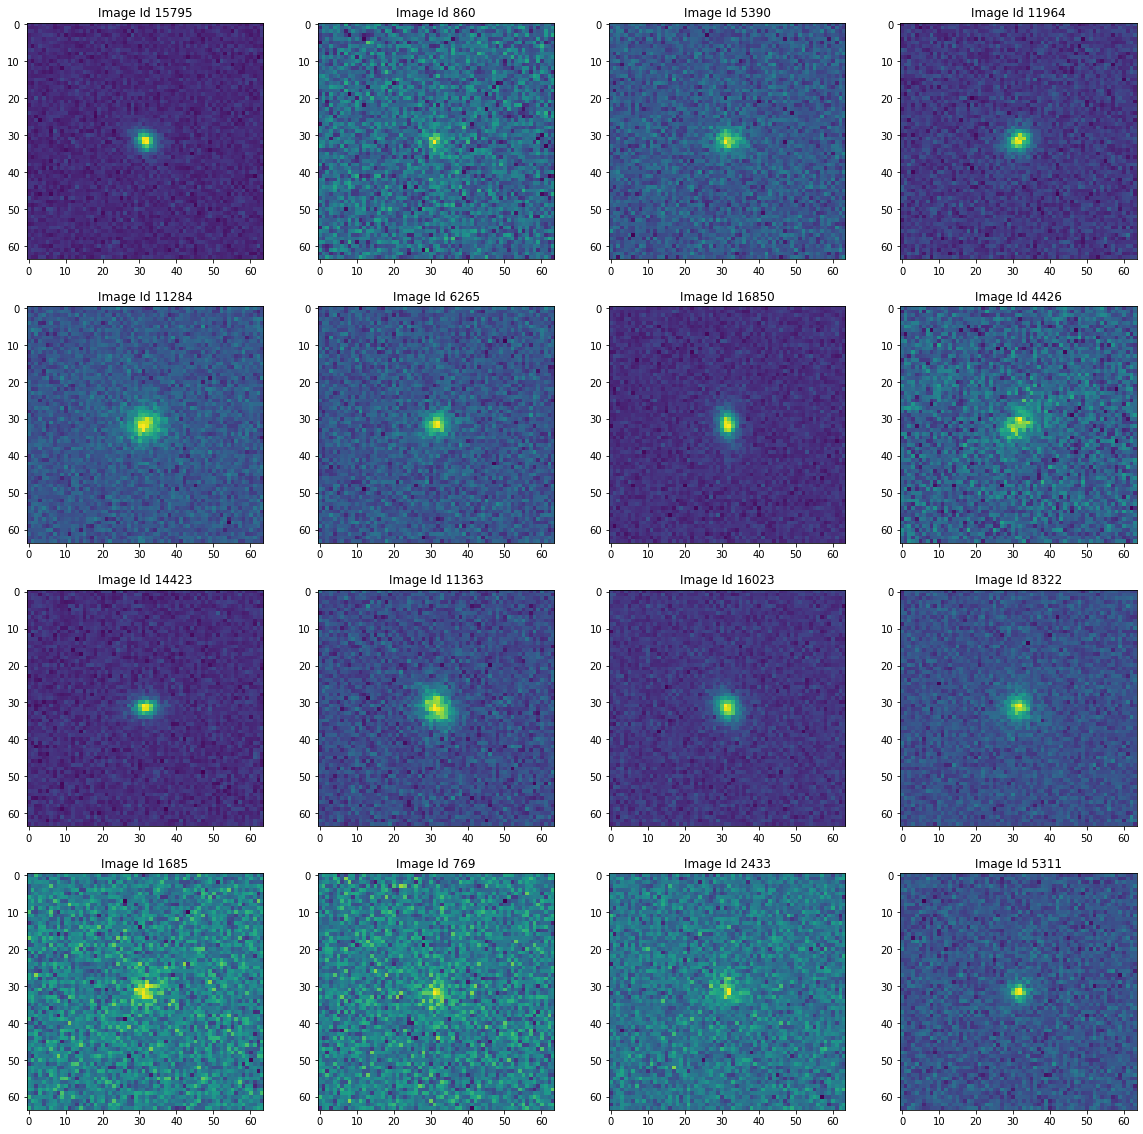

In [25]:
fig, ax = plt.subplots(4,4, figsize=(20,20))
for i in range(4):
    for j in range(4):
        ax[i,j].imshow(image[idx[i*4+j]])
        ax[i,j].set_title('Image Id {}'.format(idx[i*4+j]))

<div style="border: 3px solid #800080; padding: 10px"> 
    
We randonly select $16$ image id's above for visualization

<div class='gc'> <b> Plot selected image id's from No-noise Image table </b> </div>

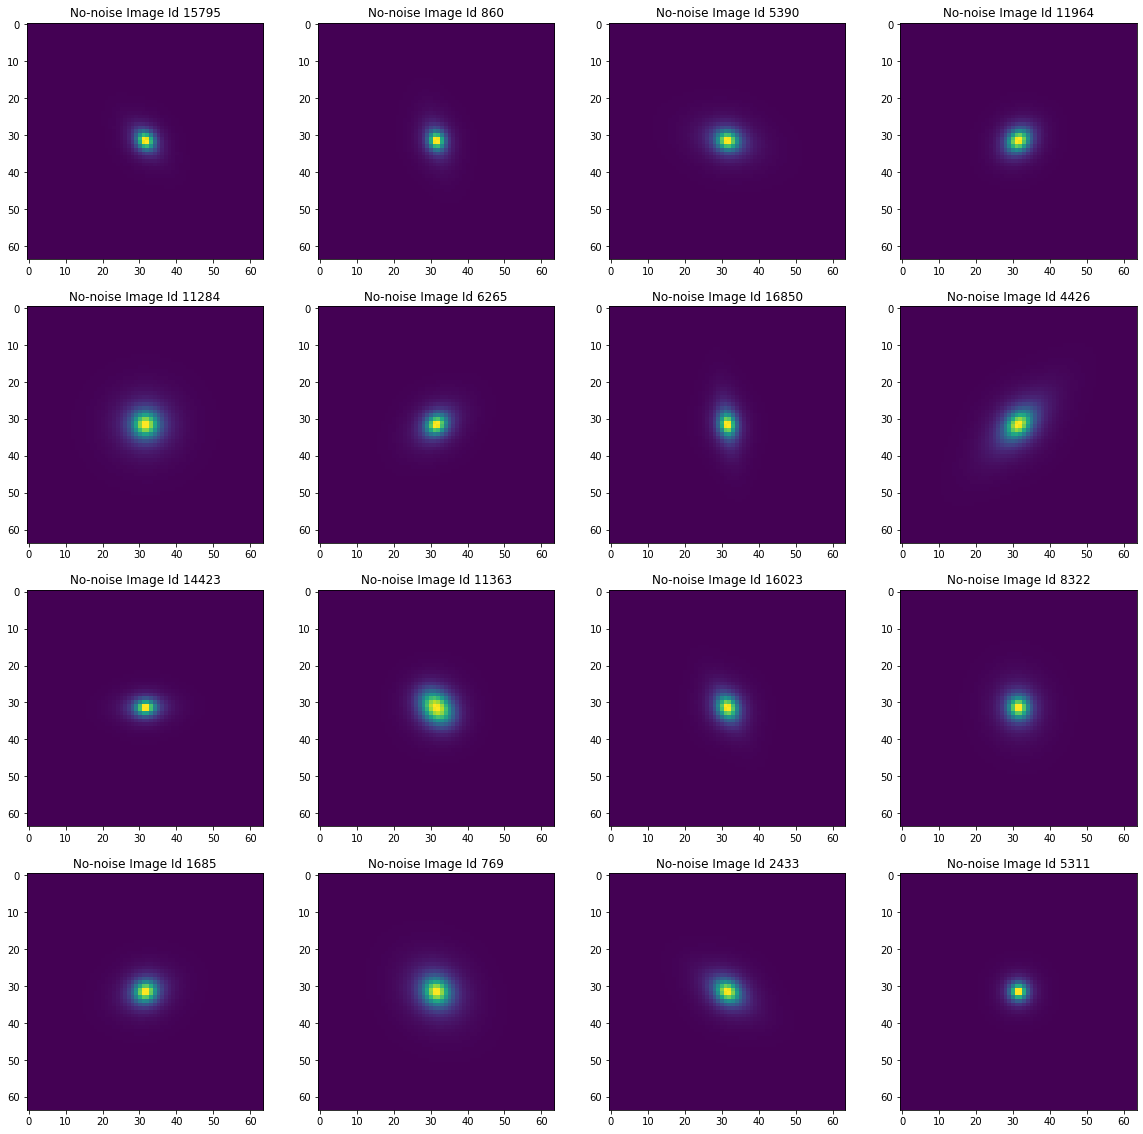

In [8]:
fig, ax = plt.subplots(4,4, figsize=(20,20))
for i in range(4):
    for j in range(4):
        ax[i,j].imshow(image_nonoise[idx[i*4+j]])
        ax[i,j].set_title('No-noise Image Id {}'.format(idx[i*4+j]))

<div style="border: 3px solid #800080; padding: 10px"> 
    
We randonly select $16$ image id's above for visualization

<div class='gc'> <b> Plot selected image id's from With-noise Image table </b> </div>

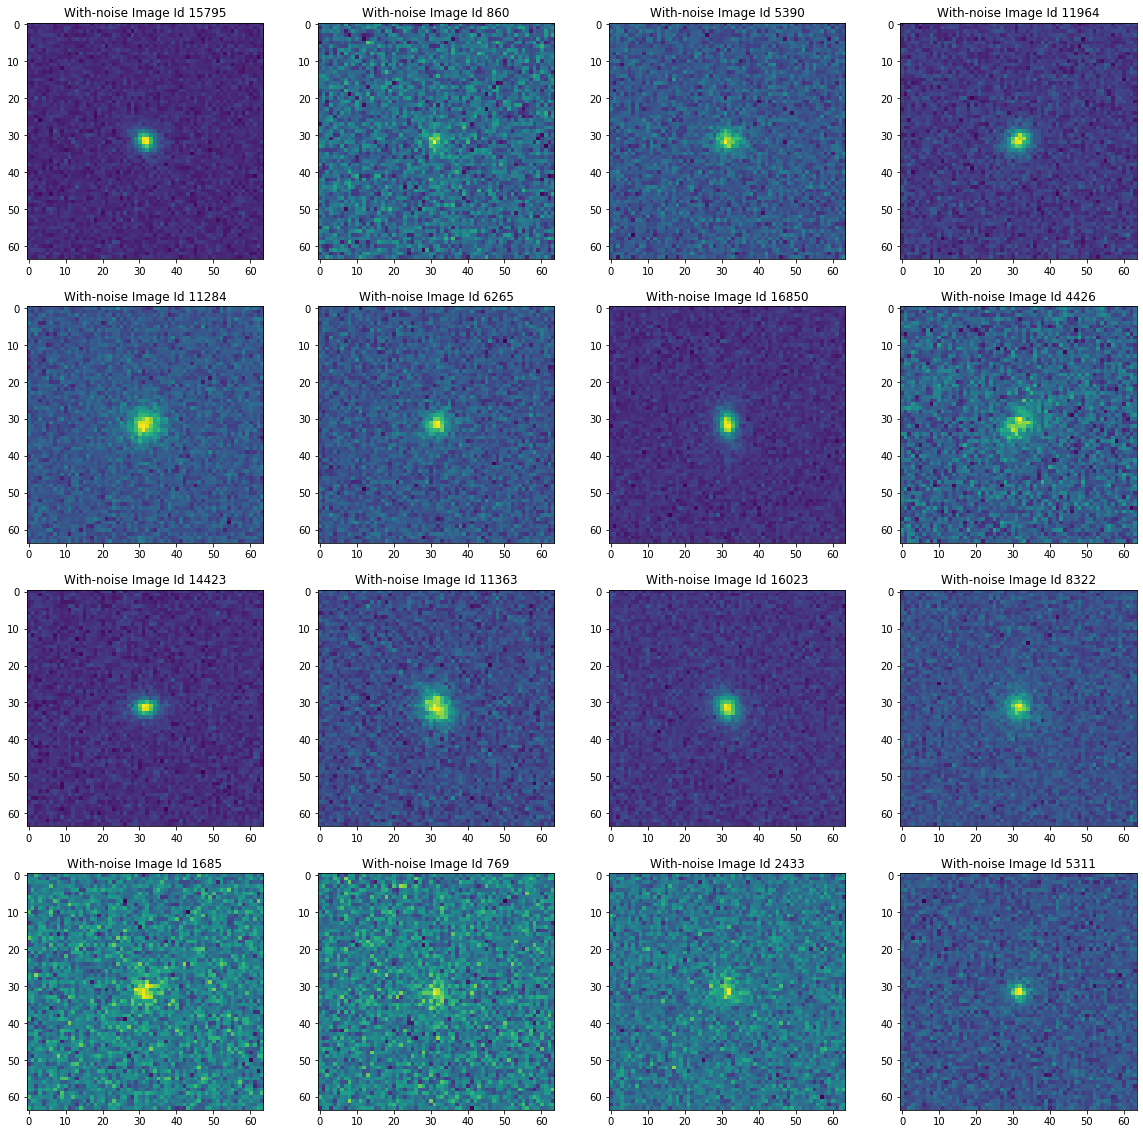

In [9]:
fig, ax = plt.subplots(4,4, figsize=(20,20))
for i in range(4):
    for j in range(4):
        ax[i,j].imshow(image_withnoise[idx[i*4+j]])
        ax[i,j].set_title('With-noise Image Id {}'.format(idx[i*4+j]))

<div style="border: 3px solid #800080; padding: 10px"> 
    
We randonly select $16$ image id's above for visualization

<div class='gc'> <b> Plot $8$ selected image id's from all three tables for comparison </b> </div>

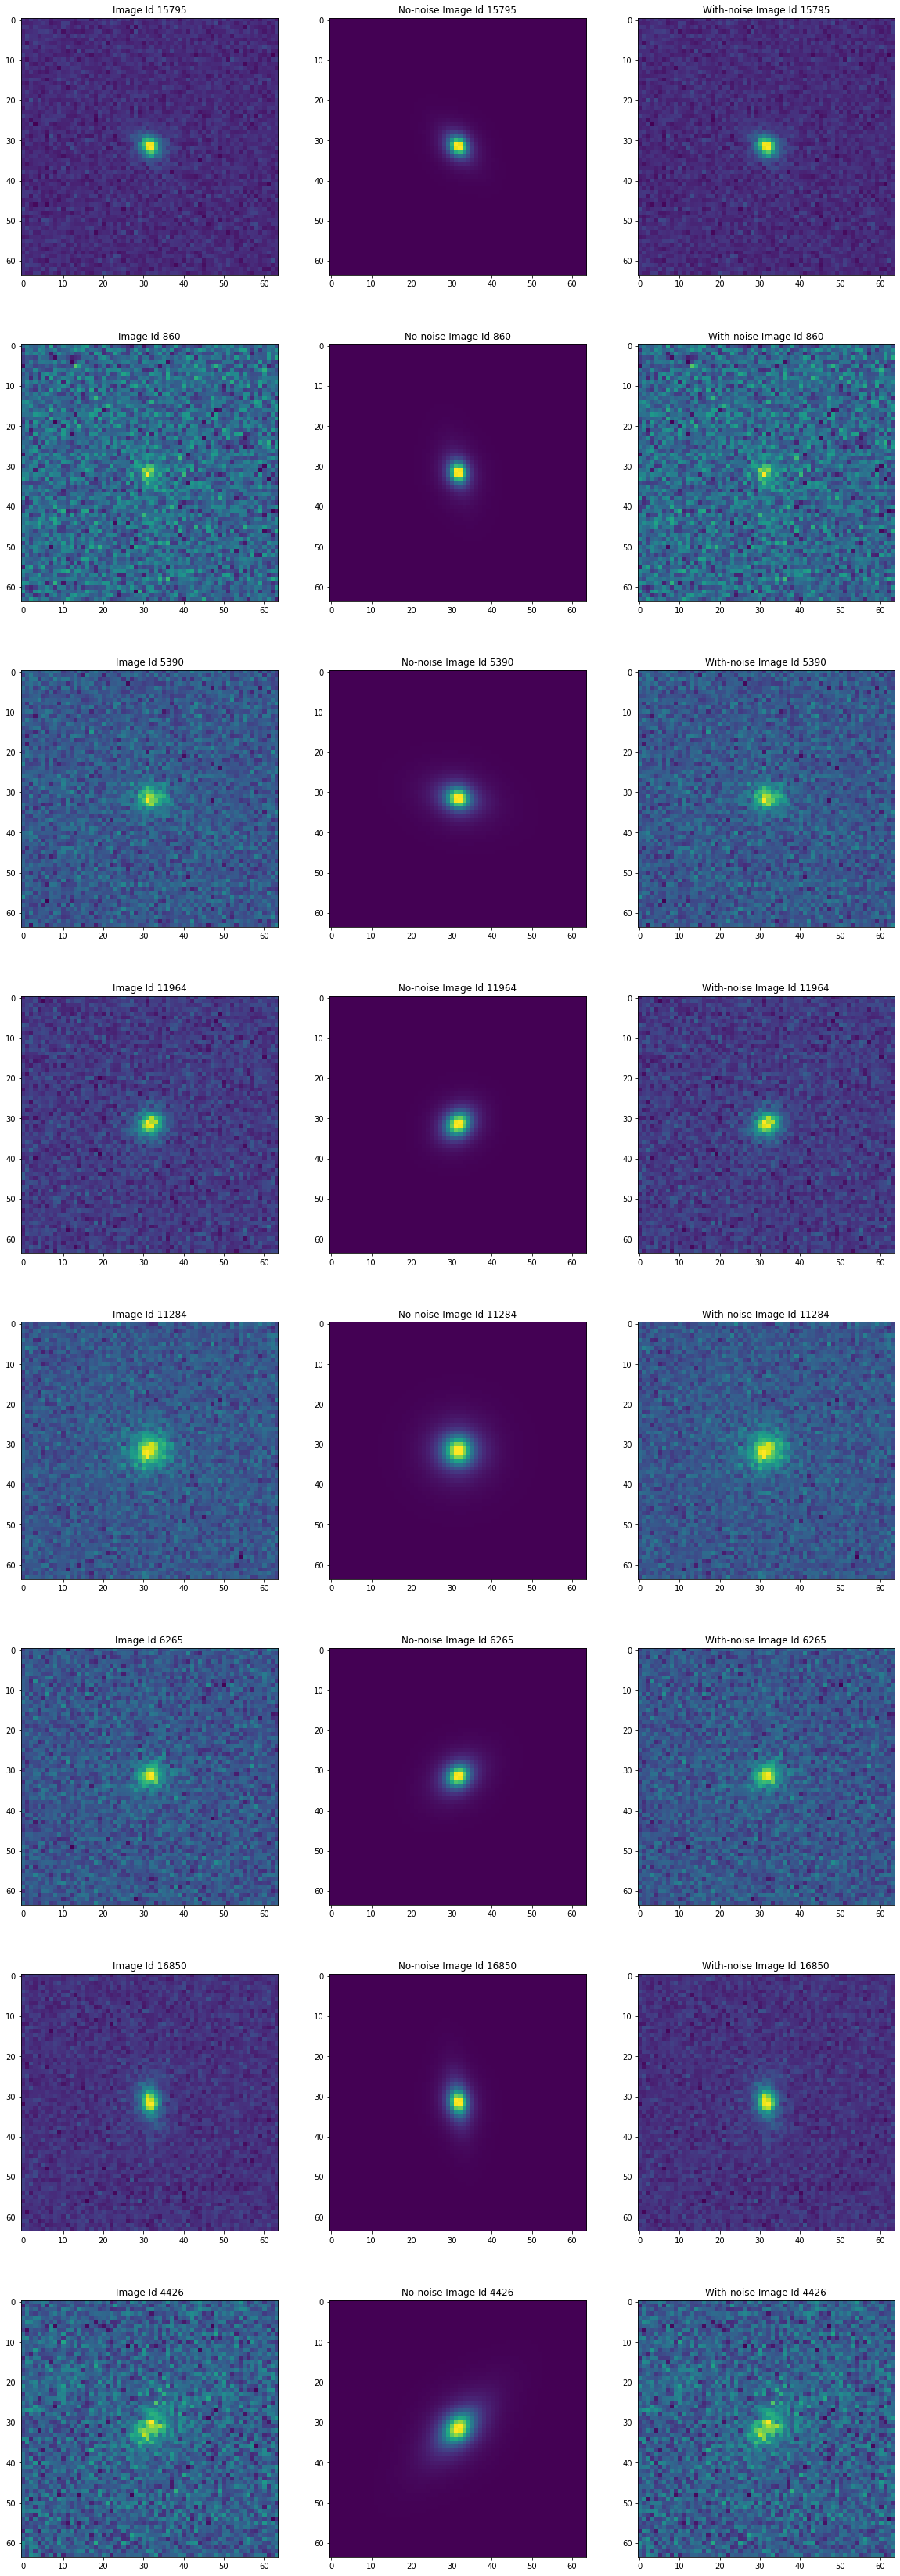

In [10]:
fig, ax = plt.subplots(8,3, figsize=(20,60))
for i in range(8):
    ax[i,0].imshow(image[idx[i]])
    ax[i,0].set_title('Image Id {}'.format(idx[i]))
    ax[i,1].imshow(image_nonoise[idx[i]])
    ax[i,1].set_title('No-noise Image Id {}'.format(idx[i]))
    ax[i,2].imshow(image_withnoise[idx[i]])
    ax[i,2].set_title('With-noise Image Id {}'.format(idx[i]))

<div style="border: 3px solid #800080; padding: 10px"> 
    
We randonly select $16$ image id's above for visualization

<div class='gc'> <b> Plot selected image id's from Image table </b> </div>

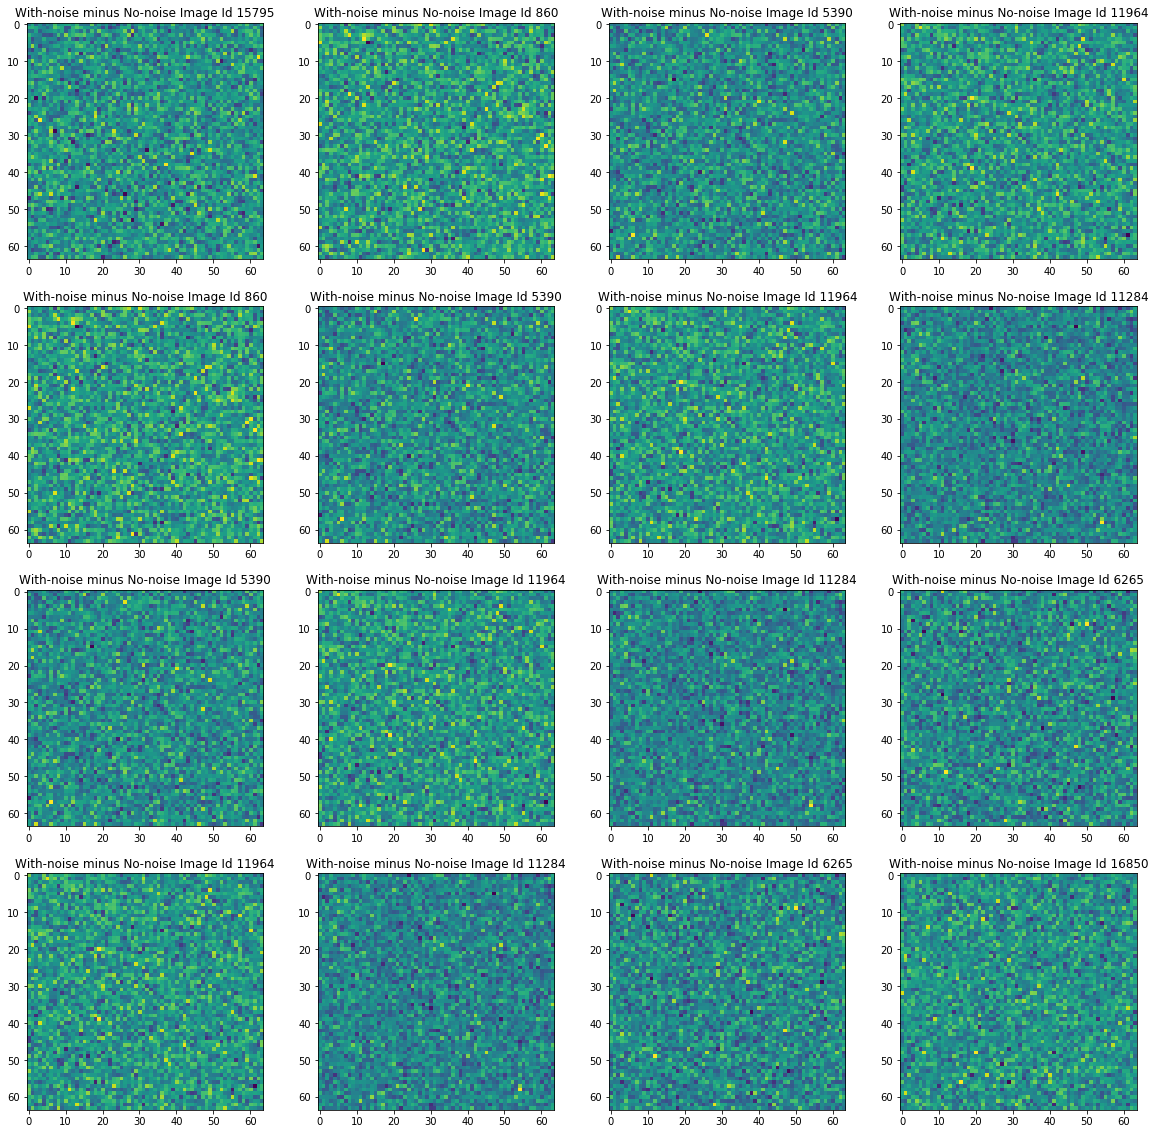

In [11]:
fig, ax = plt.subplots(4,4, figsize=(20,20))
for i in range(4):
    for j in range(4):
        img = -(image_withnoise[idx[i+j]] - image_nonoise[idx[i+j]])
        ax[i,j].imshow(img)
        ax[i,j].set_title('With-noise minus No-noise Image Id {}'.format(idx[i+j]))

<div style="border: 3px solid #800080; padding: 10px"> 
    
We randonly select $16$ image id's above for visualization

<div class='gc'> <b> Plot selected image id's from Image table </b> </div>

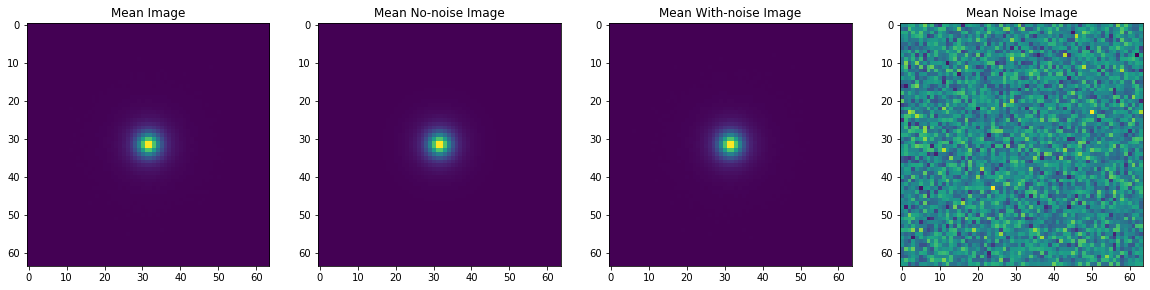

In [12]:
noise = image_withnoise - image_nonoise

fig, ax = plt.subplots(1,4, figsize=(20,10))

ax[0].imshow(image.mean(axis=0))
ax[0].set_title('Mean Image')
ax[1].imshow(image_nonoise.mean(axis=0))
ax[1].set_title('Mean No-noise Image')
ax[2].imshow(image_withnoise.mean(axis=0))
ax[2].set_title('Mean With-noise Image')
ax[3].imshow(noise.mean(axis=0))
ax[3].set_title('Mean Noise Image')

plt.show()

<div style="border: 3px solid #800080; padding: 10px"> 
    
We randonly select $16$ image id's above for visualization

### <div class='exercise'> <b> Step 4: Basic Visulaization of the image data </b> </div>

<div class='gc'> <b> Select random images for visualization </b> </div>

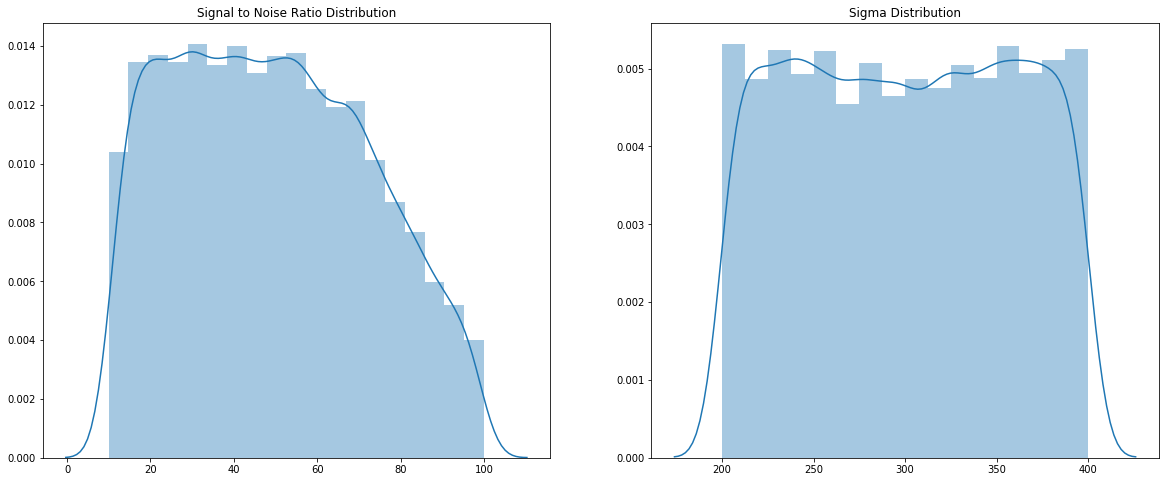

In [13]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.distplot(snr, bins='doane').set(title='Signal to Noise Ratio Distribution')
plt.subplot(1,2,2)
sns.distplot(sigma, bins='doane').set(title='Sigma Distribution')
plt.show()

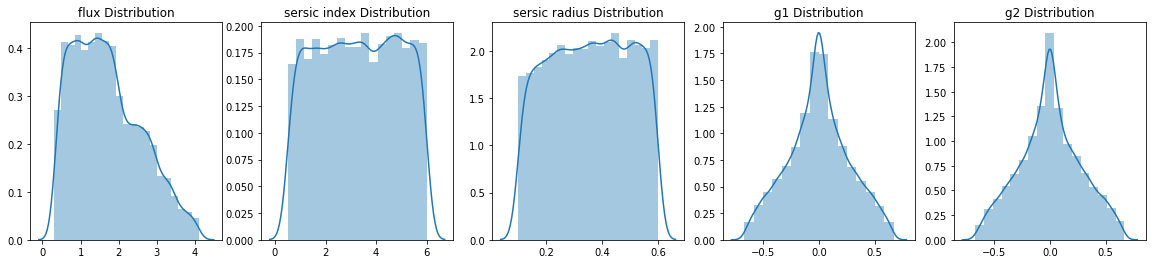

In [14]:
labels = ['flux', 'sersic index', 'sersic radius', 'g1', 'g2']

plt.figure(figsize=(20,4))

for i in range(5):
    plt.subplot(1,5,i+1)
    sns.distplot(label[:,i], bins='doane').set(title='{} Distribution'.format(labels[i]))
plt.show()

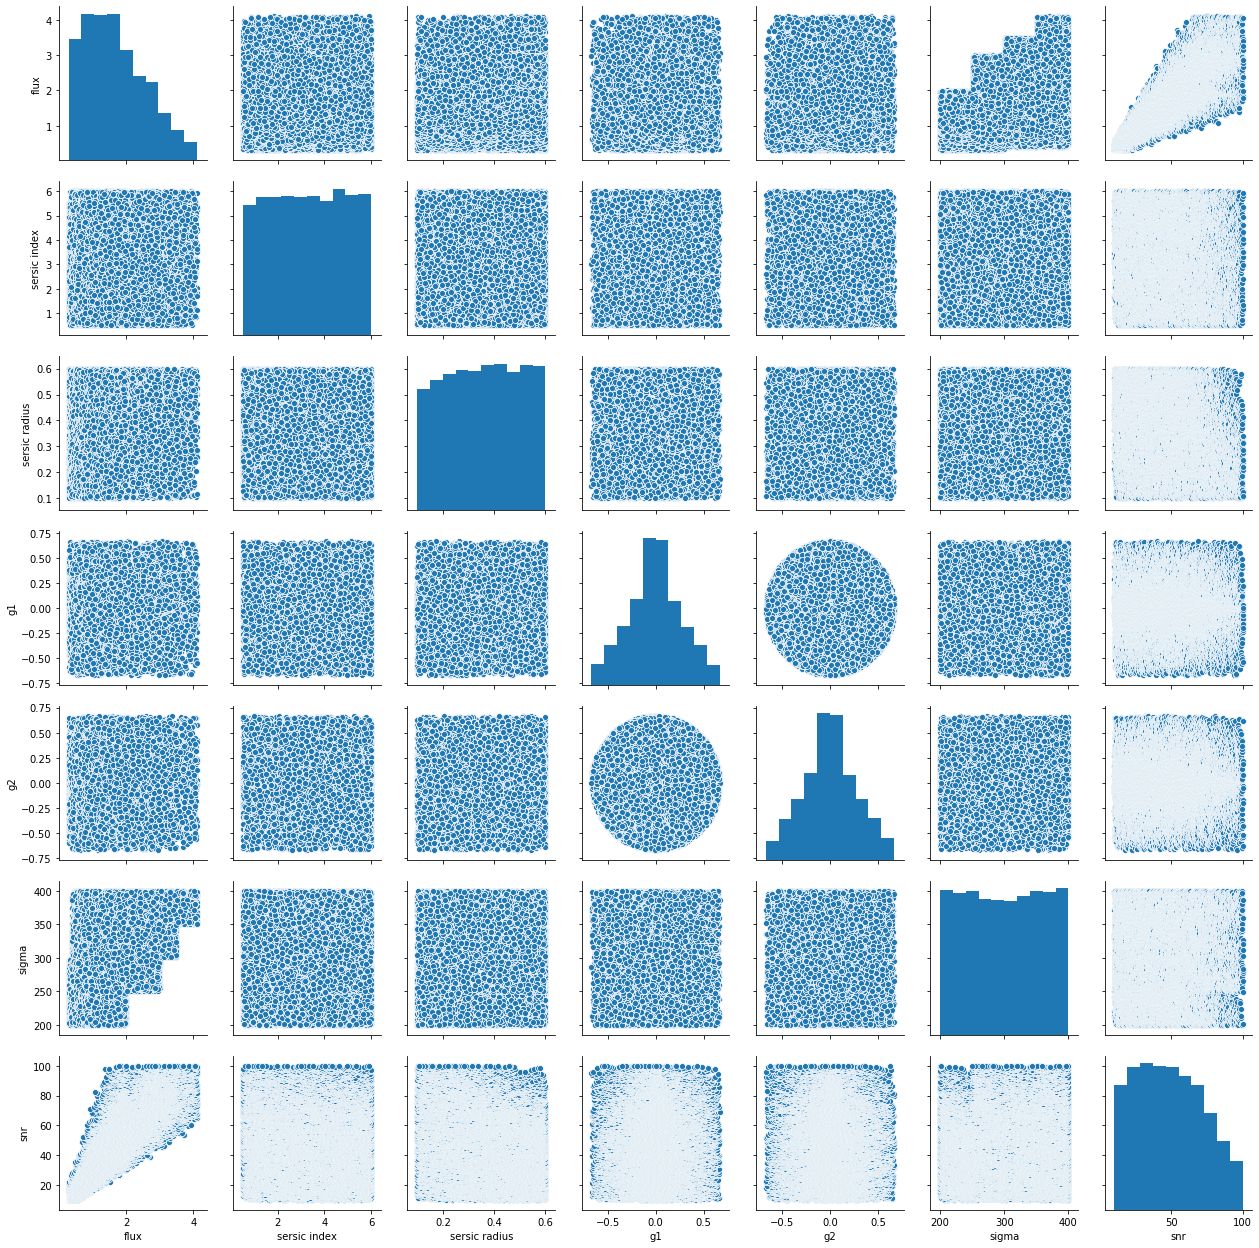

In [15]:
label_df = pd.DataFrame(label, columns=labels)
label_df['sigma'] = sigma
label_df['snr'] = snr

sns.pairplot(label_df)
plt.show()

In [16]:
def plot_galaxies(psf_re=random.uniform(0.5,1),
                  bulge_re=random.uniform(0.1,0.6),
                  bulge_n=random.uniform(0.5,6),
                  A=random.uniform(0,0.67),
                  gal_beta = random.uniform(0,3.14),
                  noise= random.randint(200,400),
                  gal_flux = random.uniform(.3,4)
                 ):
    """
    
    Parameter random generations or supplied values
    
    psf_re:   PSF moffat scale radius in arcsec 
    bulge_re: sersic radius, unit arcsec
    bulge_n:  sersic index
    A: gal_q: b/a will ranges in (0.2,1) & A=1-q / 1+q
    gal_beta: radians 
    noise:    sigma proportional to inverse of SNR
    gal_flux: flux i.e. spectral intensity in 100K units
    
    """
    size = 1
    img_nonoise_ = np.zeros((size,64,64))

    image_size = 64                      # n x n pixels
    pixel_scale = 0.23                   # arcsec / pixel
    psf_beta = 2                         #moffat parameter   

    # q is ellipticity and beta is orientation. 
    # You could directly predict q and beta but there would be a discontiniuty issue for beta. 
    # A jump from 180 degree to 1 degree. 
    # radial sampling for g1 and g2 -reduced shear -> ellipticiy and orientation 
    # gal_q =b/a will ranges in (0.2,1) & A=1-q / 1+q 
    gal_q=(1- A ) /(1+ A )      
    g_1=A *np.cos(2*gal_beta)
    g_2=A *np.sin(2*gal_beta)
    
    gal_flux = 1e5 * gal_flux

    gal = galsim.Sersic(bulge_n, half_light_radius=bulge_re)
    gal = gal.withFlux(gal_flux)
    gal = gal.shear(g1=g_1,g2=g_2)
    psf = galsim.Moffat(beta=psf_beta, flux=1., fwhm=psf_re)   
    final = galsim.Convolve([psf, gal])
    image1 = galsim.ImageF(image_size, image_size,scale=pixel_scale)
    final.drawImage(image=image1);
    image_nonoise1 = copy.deepcopy(image1.array)
    
    #signal to noise ratio, after generating data, choose data with snr [10,100]
    snr1=np.sqrt((image1.array**2).sum())/noise 

    image1.addNoise(galsim.PoissonNoise(sky_level=0.))   
    noisemap = np.random.normal(0, noise, 64*64)  #noise map for bkgr gaussian noise 
    noisemap = noisemap.reshape((64,64))
    
    #you can also use add noise to add gaussian noise by using 'image.addNoise(galsim.GaussianNoise(sigma=noise))' 
    img_fv = image1.array+noisemap   

    final_2 = psf 
    image_2 = galsim.ImageF(image_size, image_size,scale=pixel_scale)
    final_2.drawImage(image=image_2) 

    img_ = img_fv # final noised image 
    img_2_ = image_2.array  # psf 

    plt.figure(figsize=(20,8))
    ax = plt.subplot(1,3,1)
    plt.imshow(image_nonoise1) # image without noise 
    ax.set_title('image without noise')
    ax = plt.subplot(1,3,2)
    plt.imshow(img_)  # final image 
    ax.set_title('final image')
    ax = plt.subplot(1,3,3)
    plt.imshow(img_2_)  # psf
    ax.set_title('psf')
    plt.show()

In [17]:
psf_re = widgets.FloatSlider(min=0.5, max=1, step=0.05, value=0.75, 
                             description='PSF', continuous_update=False)

bulge_re = widgets.FloatSlider(min=0.1, max=0.6, step=0.05, value=0.35, 
                               description='Sersic Radius', continuous_update=False)

bulge_n = widgets.FloatSlider(min=0.5, max=6, step=0.5, value=3, 
                              description='Sersic Index', continuous_update=False)

A = widgets.FloatSlider(min=0, max=0.67, step=0.067, value=0.335, 
                        description='Ellipticity', continuous_update=False)

gal_beta = widgets.FloatSlider(min=0, max=3.14, step=0.314, value=1.57, 
                               description='Orientation', continuous_update=False)

noise = widgets.IntSlider(min=200, max=400, step=20, value=300, 
                          description='Noise', continuous_update=False)

gal_flux = widgets.FloatSlider(min=0.3, max=4, step=0.37, value=2.15, 
                               description='Flux', continuous_update=False)


input = {'psf_re': psf_re,
         'bulge_re': bulge_re,
         'bulge_n': bulge_n,
         'A': A,
         'gal_beta': gal_beta,
         'noise': noise,
         'gal_flux': gal_flux
        }

ui = widgets.VBox([psf_re, bulge_re, bulge_n, A, gal_beta, noise, gal_flux])
out = widgets.interactive_output(plot_galaxies, input)

display(ui, out)

Output()

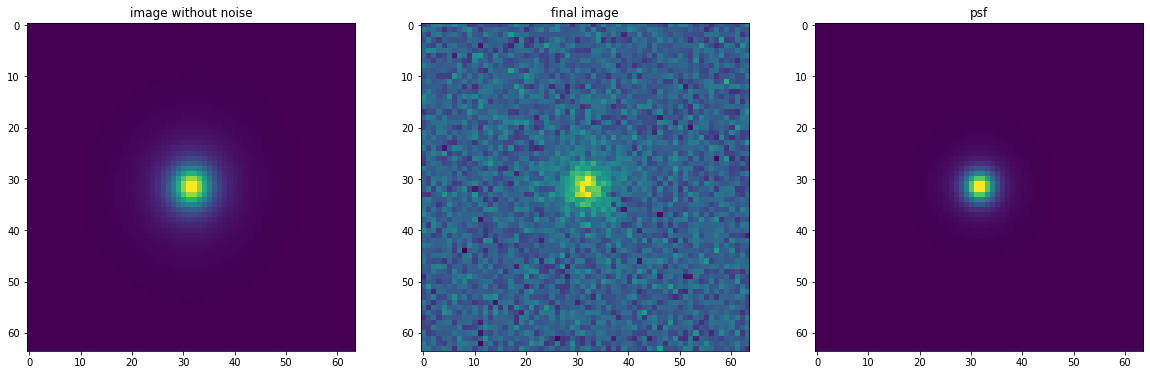

In [18]:
plot_galaxies()

## <div class="theme"> End of Exploratory Data Analysis </div> 
